<a href="https://colab.research.google.com/github/DhimanTarafdar/AAA/blob/main/final_weakly_summery_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Explain gradient descent in detail. What is the main idea behind it? How does it help in minimizing the loss function? Explain the role of learning rate and describe what happens if the learning rate is too high or too low.


---

Gradient Descent হলো একটি মৌলিক optimization algorithm যা আমাদের দেখায় কীভাবে মডেলের parameter গুলো adjust করতে হয় যাতে error কমানো যায়। নিচে এটি কীভাবে কাজ করে তার বিস্তারিত ব্যাখ্যা দেওয়া হলো।

### 1. The Main Idea Behind Gradient Descent
মূল ধারণা হলো **Weights ($W$)** এবং **Bias ($b$)** এর সর্বোত্তম মান খুঁজে বের করা যাতে মডেলের prediction যতটা সম্ভব সঠিক হয়। এটি একটি কম্পাসের মতো কাজ করে যা বলে দেয় কোন দিকে গেলে error সবচেয়ে কম হবে।

* **The Process:** এটি বর্তমান অবস্থানে loss function এর gradient (slope) হিসাব করে।
* **Direction:** যদি slope ধনাত্মক (positive) হয়, তাহলে আমরা বিপরীত দিকে যাই। যদি ঋণাত্মক (negative) হয়, তাহলে সামনে এগোই।
* **Goal:** আমরা বারবার weight update করি যতক্ষণ না **Global Minimum** এ পৌঁছাই, যেখানে loss সর্বনিম্ন হয় এবং আমরা সর্বোত্তম class separation পাই।



### 2. Minimizing the Loss Function (Mathematical Intuition)
আমাদের মডেল কতটা ভুল করছে তা নির্ণয় করার জন্য আমরা **Mean Squared Error (MSE)** loss function ব্যবহার করি। একটি single prediction এর জন্য loss ($L$) হলো:

$$L = (y - \hat{y})^2$$

যেহেতু $\hat{y} = W \cdot X + b$, তাই আমরা দেখতে পাচ্ছি loss আমাদের weight এর উপর নির্ভরশীল। এটিকে minimize করার জন্য আমরা loss কে weight ($W$) এর প্রতি partial derivative করি:

$$\frac{\partial L}{\partial W} = \frac{\partial}{\partial W} (y - (W \cdot X + b))^2$$
$$\frac{\partial L}{\partial W} = 2(y - \hat{y}) \cdot (-X)$$

**How it helps:**
Derivative $\frac{\partial L}{\partial W}$ আমাদের error hill এর "slope" জানায়। যখন error বেশি থাকে, তখন derivative বড় হয়, ফলে update বড় হয়। আর যখন আমরা সঠিক weight এর কাছাকাছি যাই, তখন $\frac{\partial L}{\partial W}$ খুব ছোট হয়ে যায় (শূন্যের দিকে ধাবিত হয়)। এর ফলে মডেল ধীরে ধীরে স্থির হয়ে সর্বোত্তম মানে পৌঁছায়।

### 3. The Weight Update Rule
প্রতিটি iteration এ আমরা নিচের সূত্র ব্যবহার করে weight update করি:

$$W_{new} = W_{old} - \eta \cdot \frac{\partial L}{\partial W}$$

এখানে $\eta$ (Eta) হলো **Learning Rate**।

### 4. The Role of Learning Rate ($\eta$)
Learning rate সবচেয়ে গুরুত্বপূর্ণ setting কারণ এটি নির্ধারণ করে আমরা minimum এর দিকে কত বড় "step" নেব।

* **If the Learning Rate is too Small:**
    * মডেল খুব ছোট ছোট step নেয়।
    * **Result:** Training খুব ধীরে হয় এবং সিদ্ধান্তে পৌঁছাতে অনেক সময় লাগে। এমনকি global minimum এ পৌঁছানোর আগেই আটকে যেতে পারে।
  
* **If the Learning Rate is too High:**
    * মডেল খুব বড় "jump" নেয়।
    * **Result:** এটি global minimum এর উপর দিয়ে লাফিয়ে চলে যেতে পারে। সর্বোত্তম পয়েন্টে স্থির হওয়ার বদলে সামনে-পেছনে bounce করতে থাকে এবং loss বাড়তেও পারে।

---


Q2. What is forward propagation in an artificial neural network? Explain step by step how data moves from the input layer to the output layer.


---

Forward propagation হলো সেই প্রক্রিয়া যার মাধ্যমে input data নেটওয়ার্কের বিভিন্ন layer অতিক্রম করে একটি prediction তৈরি করে। এটি হলো একটি neural network কীভাবে "চিন্তা" করে এবং input থেকে output ম্যাপ করে তার মৌলিক উপায়।

### 1. The Core Concept
একটি Artificial Neural Network (ANN) এ forward propagation মূলত একাধিক linear algebra operation এবং তার পরে non-linear transformation এর সমষ্টি। Data input layer থেকে শুরু করে hidden layer গুলো অতিক্রম করে শেষ পর্যন্ত output layer এ পৌঁছে আমাদের চূড়ান্ত ফলাফল ($\hat{y}$) প্রদান করে।

### 2. Step-by-Step Data Flow
আমরা layer গুলোর মধ্যে data চলাচলকে নিচেরভাবে ব্যাখ্যা করতে পারি:

* **From Input Layer ($a^{[0]}$) to Hidden Layer 1 ($a^{[1]}$):**
    Input feature ($X$ বা $a^{[0]}$) weight ($W^{[1]}$) দিয়ে গুণ করা হয় এবং তার সাথে bias ($b^{[1]}$) যোগ করা হয়। এরপর এই ফলাফলকে একটি activation function যেমন **Sigmoid** ($\sigma$) এর মাধ্যমে পাঠানো হয় যাতে non-linearity যুক্ত হয়।
    $$z^{[1]} = W^{[1]} \cdot a^{[0]} + b^{[1]}$$
    $$a^{[1]} = \sigma(z^{[1]})$$

* **From Hidden Layer 1 ($a^{[1]}$) to Hidden Layer 2 ($a^{[2]}$):**
    প্রথম hidden layer এর output দ্বিতীয় layer এর input হিসেবে কাজ করে।
    $$z^{[2]} = W^{[2]} \cdot a^{[1]} + b^{[2]}$$
    $$a^{[2]} = \sigma(z^{[2]})$$

* **Generating the Final Output ($\hat{y}$):**
    এভাবে data output layer পর্যন্ত পৌঁছায়। যদি আমাদের 3টি layer থাকে, তাহলে চূড়ান্ত prediction ($\hat{y}$) বা $a^{[3]}$ হিসাব করা হয়।



### 3. The General Equation (Nested View)
পুরো প্রক্রিয়াটি গাণিতিকভাবে দেখলে এটি একটি nested function এর মতো। একটি 3-layer network এর জন্য সামগ্রিক গণনাটি হবে:

$$\hat{y} = \sigma(W^{[3]} \cdot \sigma(W^{[2]} \cdot \sigma(W^{[1]} \cdot X + b^{[1]}) + b^{[2]}) + b^{[3]})$$

### 4. Role of the Sigmoid Function
Forward propagation চলাকালে **Sigmoid Function** অত্যন্ত গুরুত্বপূর্ণ ভূমিকা পালন করে।
* **Non-linearity:** এটি না থাকলে আমাদের মডেল একটি সাধারণ linear regressor এ পরিণত হতো।
* **Curved Boundaries:** যেমন আমি লক্ষ্য করেছি, sigmoid function মডেলকে decision boundary বাঁকাতে (bend) সাহায্য করে। এর ফলে curved boundary তৈরি হয়, যা জটিল pattern classify করতে সক্ষম যেখানে একটি সরল রেখা ব্যর্থ হয়।
* **Output Range:** এটি যেকোনো input মানকে 0 থেকে 1 এর মধ্যে সীমাবদ্ধ (squash) করে, যা probability ভিত্তিক classification এর জন্য উপযুক্ত।



### 5. Intuition
প্রতিটি layer এর neuron পূর্বের layer থেকে signal গ্রহণ করে, একটি weighted sum গণনা করে এবং activation function এর মাধ্যমে সিদ্ধান্ত নেয় কতটুকু signal সামনে পাঠাবে। এইভাবে layer-by-layer তথ্য আদান-প্রদান করার প্রক্রিয়াকেই আমরা Forward Propagation বলি।

---
```


Q3. Why do we need activation functions in neural networks? What would happen if we only used linear transformations without any activation function?


---

Activation function হলো সেই গোপন উপাদান যা Deep Learning-কে সত্যিকার অর্থে "deep" বানায়। এগুলো না থাকলে একটি neural network কেবলমাত্র একটি উন্নত (glorified) linear regression model হয়ে যেত। নিচে ব্যাখ্যা করা হলো কেন এগুলো অপরিহার্য।

### 1. Breaking Linearity (The Core Reason)
Activation function এর প্রধান কাজ হলো নেটওয়ার্কে **non-linearity** যুক্ত করা। বাস্তব জগতের বেশিরভাগ data (যেমন image, audio, বা medical record) জটিল এবং একটি সাধারণ সরল রেখা দিয়ে আলাদা করা যায় না।

* **Linear Transformation:** প্রতিটি layer গণনা করে $Z = W \cdot X + b$। এটি কেবল একটি সরল রেখা নির্দেশ করে।
* **Non-Linear Transformation:** যখন আমরা $\sigma(Z)$ বা $ReLU(Z)$ এর মতো activation function প্রয়োগ করি, তখন আমরা সেই সরল রেখাটিকে "bend" বা বাঁকাই। এর ফলে মডেল জটিল ও বক্র (curved) decision boundary তৈরি করতে পারে, যা কঠিন pattern গুলোকে classify করতে সক্ষম।



### 2. What Happens Without Activation Functions? (Mathematical Collapse)
যদি আমরা activation function ছাড়া একাধিক layer একত্রে stack করি, তাহলে পুরো network একটি single linear layer এ "collapse" হয়ে যায়।

ধরি আমাদের দুটি layer আছে:
1. $h_1 = W_1 \cdot X + b_1$
2. $y = W_2 \cdot h_1 + b_2$

এখন $h_1$ কে দ্বিতীয় সমীকরণে বসাই:
$$y = W_2 \cdot (W_1 \cdot X + b_1) + b_2$$
$$y = (W_2 \cdot W_1) \cdot X + (W_2 \cdot b_1 + b_2)$$

গাণিতিকভাবে, $(W_2 \cdot W_1)$ হলো আরেকটি matrix ($W_{new}$) এবং $(W_2 \cdot b_1 + b_2)$ হলো আরেকটি bias ($b_{new}$)।  
অতএব, ফলাফল দাঁড়ায়:
$$y = W_{new} \cdot X + b_{new}$$

**The Outcome:** আমরা যতগুলোই hidden layer যোগ করি (10, 100, বা 1000), মডেলটি শেষ পর্যন্ত একটি **Single Layer Perceptron** হিসেবেই কাজ করবে। Activation function ব্যবহার না করলে network "deep" করলেও অতিরিক্ত learning power পাওয়া যাবে না।

### 3. A Simple Intuition (The Glass Layer Analogy)
আমি এটি একটি উপমা দিয়ে কল্পনা করতে পছন্দ করি:  
> ভাবুন আপনার কাছে কয়েকটি স্বচ্ছ কাচের শিট আছে। আপনি যদি প্রতিটি কাচে একটি করে সরল রেখা আঁকেন এবং সেগুলো একটির উপর আরেকটি ঠিকভাবে রাখেন, তাহলে উপরে থেকে দেখলে আপনি এখনও শুধু একটি **সরল রেখা**-ই দেখতে পাবেন। কখনোই কেবল সরল রেখা স্তূপ করে একটি বৃত্ত, বক্ররেখা বা জটিল মানচিত্র তৈরি করা সম্ভব নয়।

Activation function একটি lens এর মতো কাজ করে যা সেই সরল রেখাগুলোকে বাঁকায় ও বিকৃত করে। প্রতিটি layer এ রেখাগুলো বাঁকানোর মাধ্যমে আমরা ধীরে ধীরে জটিল আকার ও pattern (যেমন বৃত্ত বা zig-zag) তৈরি করতে পারি, যা আমাদের data সঠিকভাবে আলাদা করতে সাহায্য করে।



### 4. Helping Gradient Descent (Derivatives)
Activation function training প্রক্রিয়াতেও গুরুত্বপূর্ণ ভূমিকা রাখে। Gradient Descent কাজ করার জন্য আমাদের derivative (gradient) গণনা করতে হয়।  
* **Sigmoid** বা **Tanh** এর মতো function প্রতিটি পয়েন্টে differentiable।  
* এর ফলে মডেল বুঝতে পারে weight সামান্য পরিবর্তন করলে error কতটা পরিবর্তিত হয়। উপযুক্ত activation function ছাড়া multi-layer context এ gradient গণনা অর্থহীন হয়ে পড়ে।

### Summary of Why We Need Them:
1. **To Solve Non-Linear Problems:** বাস্তব data সাধারণত linear নয়।
2. **To Prevent Layer Collapse:** যাতে "Deep" সত্যিই বেশি learning capacity বোঝায়।
3. **To Enable Backpropagation:** Gradient গণনা ও weight update করার সুযোগ প্রদান করে।

---
```


Q4. Explain the sigmoid activation function. Where is it used? What are its advantages and disadvantages? What problem does it cause during training?


---

Sigmoid activation function Deep Learning-এর অন্যতম প্রাচীন ও ক্লাসিক activation function। এটি একটি non-linear function যা input মানকে একটি নির্দিষ্ট probability range-এর মধ্যে সীমাবদ্ধ (squash) করে।

### 1. What is the Sigmoid Function?
গাণিতিকভাবে, Sigmoid function যেকোনো real-valued সংখ্যা কে **0 এবং 1** এর মধ্যে map করে। Sigmoid function-এর সূত্র হলো:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$



### 2. How it Helps in Classification
Sigmoid function-এর output কে একটি **probability** হিসেবে ব্যাখ্যা করা যায়।  
* **Range:** যেহেতু output সবসময় 0 এবং 1 এর মধ্যে থাকে, তাই এটি সেইসব মডেলের জন্য উপযুক্ত যেখানে একটি class-এর probability predict করতে হয়।  
* **Threshold:** সাধারণত আমরা **0.5** threshold ব্যবহার করি। যদি output $\geq 0.5$ হয়, তাহলে এটিকে Class 1 হিসেবে classify করি; আর যদি $< 0.5$ হয়, তাহলে Class 0 হিসেবে ধরি। এর ফলে সহজেই একটি decision boundary তৈরি করা যায় এবং বিভিন্ন class আলাদা করা সম্ভব হয়।

### 3. Where is it Used?
* **Output Layer:** এটি প্রধানত **Binary Classification** সমস্যার output layer-এ ব্যবহার করা হয় (যেমন: একটি email Spam কিনা বা Not Spam তা predict করা)।  
* **Early Neural Networks:** ঐতিহাসিকভাবে hidden layer-এও ব্যবহার হতো, যদিও আধুনিক architecture-এ এটি বেশিরভাগ ক্ষেত্রে ReLU দ্বারা প্রতিস্থাপিত হয়েছে।

### 4. Advantages and Disadvantages
| Advantages | Disadvantages |
| :--- | :--- |
| **Smooth Gradient:** এর curve মসৃণ, তাই যেকোনো point-এ সহজেই derivative গণনা করা যায়। | **Vanishing Gradient Problem:** Training চলাকালে এটি সবচেয়ে বড় সমস্যা। |
| **Probability Output:** Classification task-এর জন্য পরিষ্কার probability interpretation দেয়। | **Computationally Expensive:** Exponential function ($e^{-z}$) গণনা করা ReLU-এর তুলনায় ধীর। |
| **Normalization:** Activation-কে খুব বেশি বড় মানে explode করতে দেয় না। | **Not Zero-Centered:** Output সবসময় positive হওয়ায় gradient update কম কার্যকর হতে পারে। |

### 5. The Problem During Training: Vanishing Gradient
Sigmoid-এর ক্ষেত্রে training চলাকালে সবচেয়ে গুরুত্বপূর্ণ সমস্যা হলো **Vanishing Gradient Problem**।

* **The Cause:** Sigmoid curve-এর দুই প্রান্তে (যখন $z$ খুব বড় বা খুব ছোট) graph অনেকটা flat হয়ে যায়।  
* **The Effect:** এই flat অঞ্চলে derivative (gradient) প্রায় **zero** হয়ে যায়।  
* **The Result:** Backpropagation চলাকালে layer থেকে layer-এ এই ছোট gradient গুলো গুণ হতে থাকে। ফলে আগের layer-এ পৌঁছাতে পৌঁছাতে gradient এতটাই ছোট হয়ে যায় (vanish করে) যে weight আর update হয় না। কার্যত মডেল **শেখা বন্ধ করে দেয়**, এবং training plateau হয়ে যায়।

---
```


Q5. Explain the softmax activation function in simple words. Why is it used in multi-class classification problems? How is it different from sigmoid?


---

যখন আমাদের দুইটির বেশি category নিয়ে কাজ করতে হয়, তখন সবগুলো class-এর মধ্যে probability বণ্টন করার একটি উপায় প্রয়োজন। ঠিক এই কাজটিই **Softmax** activation function করে।

### 1. What is Softmax?
সহজ ভাষায়, Softmax হলো একটি activation function যা একটি সংখ্যার vector (logits) কে probability-এর vector-এ রূপান্তর করে। এই probability গুলোর যোগফল সবসময় **1** হয়।

* **Logits ($Z$):** এগুলো হলো activation দেওয়ার আগে শেষ layer থেকে পাওয়া raw score।
* **Probability:** Softmax নিশ্চিত করে যে প্রতিটি class-এর মান 0 এবং 1 এর মধ্যে থাকবে।

নির্দিষ্ট একটি class $i$ এর জন্য Softmax-এর সূত্র হলো:
$$\sigma(Z_i) = \frac{e^{Z_i}}{\sum_{j=1}^{K} e^{Z_j}}$$

এখানে, $K$ হলো মোট class-এর সংখ্যা। Exponential ($e$) ব্যবহার করার মাধ্যমে Softmax সবচেয়ে বড় logit-কে আরও বেশি highlight করে, অর্থাৎ সর্বোচ্চ মানকে উপরে ঠেলে দেয় এবং বাকিগুলোকে তুলনামূলকভাবে কমিয়ে দেয়।



### 2. Use in Multi-class Classification
ধরি আমরা একটি image classify করছি, যা হতে পারে **Cat, Dog, বা Horse**।  
* মডেল তিনটি raw score (logits) তৈরি করে।  
* Softmax সেই score গুলোকে রূপান্তর করে এমন কিছু দেয়: **Cat (0.70), Dog (0.20), Horse (0.10)**।  
* যেহেতু 0.70 সবচেয়ে বেশি, তাই মডেল "Cat" predict করে।

**Why it's great:** এটি শুধু বিজয়ী নির্ধারণ করে না; বরং প্রতিটি class সম্পর্কে মডেল কতটা confident তাও জানায়। যদি একটি class-এর probability বাড়ে, তাহলে অন্যগুলোর probability কমতেই হবে, কারণ মোট যোগফল সবসময় 1.0 থাকে।

### 3. Softmax vs. Sigmoid: Key Differences
যদিও দুটি function-ই probability নিয়ে কাজ করে, তবে এদের উদ্দেশ্য আলাদা:

| Feature | Sigmoid | Softmax |
| :--- | :--- | :--- |
| **Output Type** | প্রতিটি class-এর জন্য স্বাধীন probability। | নির্ভরশীল probability (মোট যোগফল = 1)। |
| **Best Used For** | **Binary Classification** (Yes/No, Spam/Not Spam)। | **Multi-class Classification** (Cat/Dog/Horse)। |
| **Nature** | প্রতিটি output আলাদাভাবে বিবেচনা করে। | সব output-কে একটি সম্পর্কিত সেট হিসেবে বিবেচনা করে। |
| **Outcome** | একাধিক class-এর probability বেশি হতে পারে। | সাধারণত একটি স্পষ্ট "winner" নির্ধারণ করে। |



### 4. Summary of Mechanics
Softmax হলো multi-class প্রতিযোগিতার একজন "judge"। Denominator-এ summation ব্যবহার করার মাধ্যমে এটি class গুলোর মধ্যে প্রতিযোগিতা তৈরি করে। যেমন আমি লক্ষ্য করেছি, যদি "Cat"-এর logit অন্যগুলোর তুলনায় সামান্য বেশি হয়, তাহলে Softmax সেই পার্থক্যকে বাড়িয়ে তোলে, ফলে চূড়ান্ত classification আরও পরিষ্কার ও নির্দিষ্ট হয়ে যায়।

---
```


Q6. Explain the structure of an Artificial Neural Network in detail. Describe the role of the input layer, hidden layers, and output layer. How do weights, biases, and activation functions work together to transform input data into predictions? Illustrate your explanation with a simple example.


---

Artificial Neural Network (ANN) আমাদের মস্তিষ্কের জৈবিক neuron দ্বারা অনুপ্রাণিত। এটি একাধিক পরস্পর সংযুক্ত "neuron" এর layer নিয়ে গঠিত, যা তথ্য প্রক্রিয়াকরণ করে এবং pattern শিখে।

### 1. The Structure of an ANN
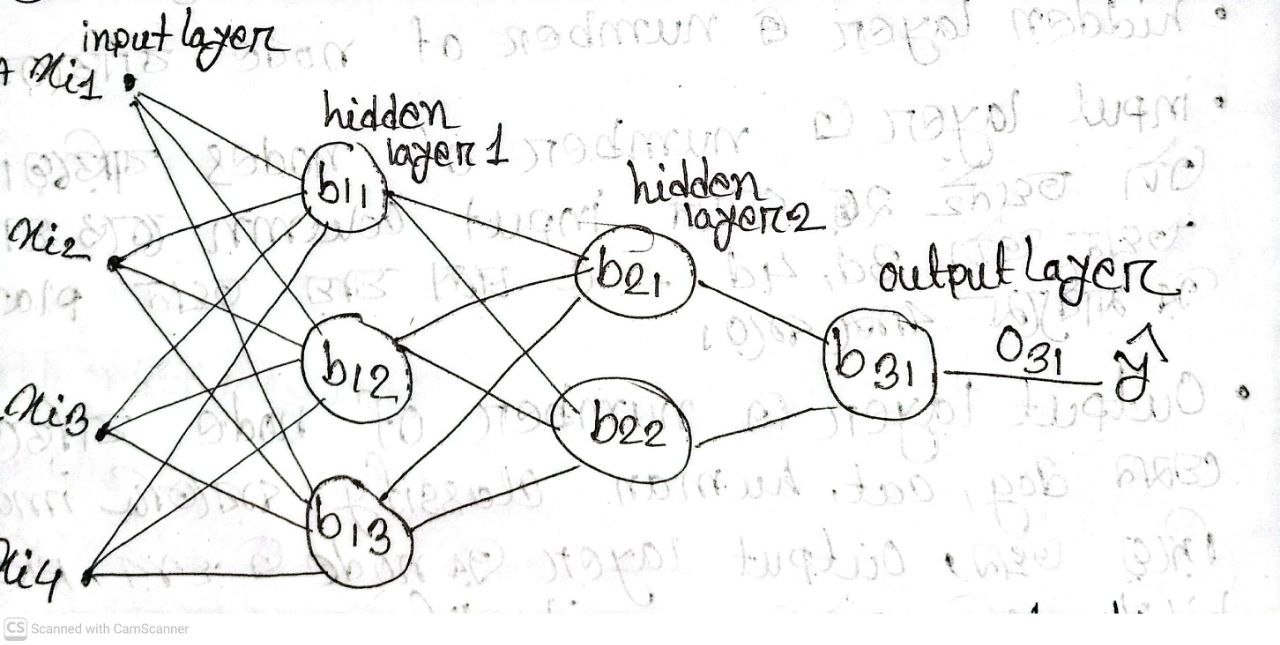
একটি সাধারণ ANN মূলত তিন ধরনের layer নিয়ে গঠিত:

* **Input Layer:** এটি হলো data প্রবেশের স্তর। এখানে প্রতিটি neuron একটি input feature উপস্থাপন করে (যেমন: image-এর pixel value বা height/weight data)। এটি কোনো গণনা করে না; শুধু মানগুলো পরবর্তী layer-এ পাঠিয়ে দেয়।
* **Hidden Layers:** এগুলো input এবং output layer-এর মাঝখানে থাকে। এখানেই আসল "magic" ঘটে। এই layer গুলো data থেকে জটিল feature বের করে। একটি network-এ এক বা একাধিক hidden layer থাকতে পারে (যাকে Deep Learning বলা হয়)।
* **Output Layer:** এটি হলো শেষ স্তর যা prediction ($\hat{y}$) প্রদান করে, যেমন classification (Cat বা Dog) অথবা কোনো continuous মান।



### 2. The Components: Weights, Biases, and Activation Functions
Raw input-কে অর্থপূর্ণ prediction-এ রূপান্তর করার জন্য প্রতিটি neuron-এর মধ্যে এই তিনটি উপাদান একসাথে কাজ করে:

1. **Weights ($W$):** Weight বোঝায় neuron গুলোর মধ্যে সংযোগের **strength** বা গুরুত্ব। কোনো feature যদি prediction-এর জন্য বেশি গুরুত্বপূর্ণ হয়, তাহলে তার weight বেশি হবে।
2. **Bias ($b$):** Bias হলো একটি অতিরিক্ত constant যা weighted sum-এর সাথে যোগ হয়। এটি activation function-কে উপরে বা নিচে shift করতে সাহায্য করে, ফলে মডেল data-এর সাথে আরও ভালোভাবে fit হতে পারে।
3. **Activation Function:** এটি একটি গাণিতিক filter যা নির্ধারণ করে neuron "fire" করবে কিনা। এটি non-linearity যোগ করে, ফলে মডেল জটিল ও সরলরেখাবিহীন pattern শিখতে পারে।

### 3. How They Work Together (The Transformation)
প্রতিটি neuron দুই ধাপে গণনা করে:

* **Step 1 (Linear):** সব input-এর weighted sum বের করে এবং bias যোগ করে।
    $$Z = (W_1 \cdot X_1 + W_2 \cdot X_2 + ... + W_n \cdot X_n) + b$$

* **Step 2 (Non-Linear):** এরপর $Z$ কে একটি activation function (যেমন ReLU বা Sigmoid) এর মাধ্যমে পাঠায়।
    $$a = \text{Activation}(Z)$$

### 4. Illustrative Example: Predicting if a Student Passes
ধরি আমরা দুইটি input-এর ভিত্তিতে predict করতে চাই একজন ছাত্র পরীক্ষায় পাশ করবে কিনা: **Study Hours** এবং **Attendance**।

* **Input Layer:** দুটি neuron ($X_1 = \text{Study Hours}$, $X_2 = \text{Attendance}$)।
* **Weights:** ধরি Study Hours বেশি গুরুত্বপূর্ণ, তাই $W_1 = 0.8$ এবং $W_2 = 0.2$।
* **Bias:** ধরি bias $b = -0.5$।
* **Hidden Layer Transformation:** তখন neuron গণনা করবে:
    $$Z = (0.8 \cdot \text{Hours} + 0.2 \cdot \text{Attendance}) - 0.5$$
* **Activation:** এরপর $Z$ এর উপর Sigmoid function প্রয়োগ করা হবে। ফলাফল যদি 1-এর কাছাকাছি হয়, তাহলে ছাত্রকে **Pass** হিসেবে predict করা হবে; আর যদি 0-এর কাছাকাছি হয়, তাহলে **Fail**।

### 5. Summary of Data Flow
Input data প্রথমে **Input Layer** দিয়ে প্রবেশ করে, তারপর **Weights** দ্বারা scale হয়, **Biases** দ্বারা shift হয় এবং **Hidden Layers**-এ **Activation Function** এর মাধ্যমে রূপান্তরিত হয়। এই প্রক্রিয়া চলতে থাকে যতক্ষণ না data **Output Layer**-এ পৌঁছে চূড়ান্ত prediction দেয়। এই পুরো প্রবাহকেই বলা হয় **Forward Propagation**।

---
```


Q7. Train a neural network using TensorFlow Playground on any dataset other than XOR (for example, circles, spiral, or Gaussian). Use at least two hidden layers and select appropriate activation functions. Experiment with different numbers of neurons, learning rates, and regularization techniques.

After training the model:

Attach a screenshot of the model architecture and the final decision boundary.

Report the training loss and any relevant observations.

Analyze how the decision boundary evolved during training.

Discuss whether the model shows signs of overfitting or underfitting.

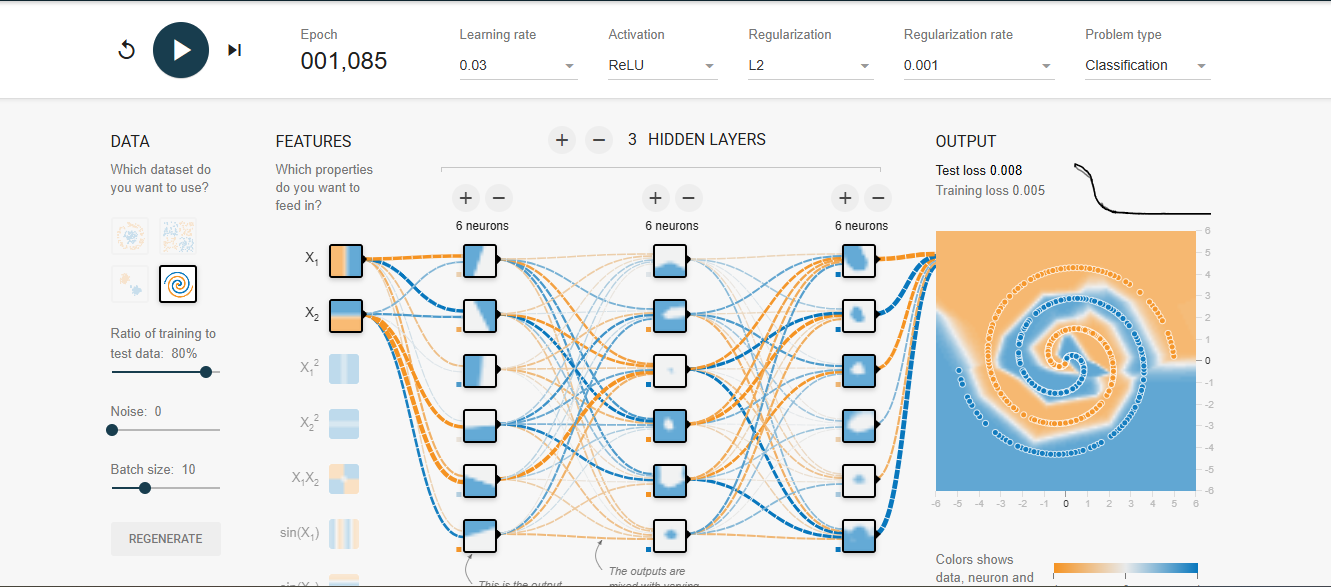

In [1]:
from IPython.display import Image, display

# Image display
display(Image("/content/Screenshot 2026-02-17 195925.png", width=1200))


---

এই experiment-এ আমি একটি neural network ব্যবহার করে অত্যন্ত জটিল **Spiral Dataset** classify করেছি। এই dataset খুবই কঠিন, কারণ এর class গুলো non-linear ভাবে একে অপরের সাথে জড়িয়ে থাকে। তাই এটি শেখার জন্য একটি deeper network এবং সঠিক tuning প্রয়োজন।

### 1. Model Architecture & Configuration
TensorFlow Playground-এ আমার experimental setup ছিল নিম্নরূপ:

* **Dataset:** Spiral (সবচেয়ে জটিল non-linear pattern)  
* **Hidden Layers:** 3টি Layer (প্রতিটি layer-এ 6টি neuron)  
* **Activation Function:** **ReLU** (Rectified Linear Unit), যা Sigmoid-এর vanishing gradient সমস্যার ঝুঁকি ছাড়াই দ্রুত complex curve শিখতে সাহায্য করেছে।  
* **Learning Rate:** 0.03  
* **Regularization:** L2, rate = 0.001 (overfitting প্রতিরোধের জন্য)  
* **Features Used:** $X_1$ এবং $X_2$  


### 2. Final Results and Observations
**1,000 epoch**-এর বেশি training করার পর মডেলটি খুব উচ্চ মানের accuracy অর্জন করেছে।

* **Training Loss:** 0.005  
* **Test Loss:** 0.008  

**Observations:**  
আমি লক্ষ্য করেছি, শুরুতে মডেলটি খুব সাধারণ linear separation তৈরি করেছিল। কিন্তু epoch বাড়ার সাথে সাথে (প্রায় 500+ epoch-এর পর) decision boundary ধীরে ধীরে "curl" হতে শুরু করে এবং spiral আকৃতি অনুসরণ করতে থাকে। Training loss এবং Test loss-এর মধ্যে খুব কম পার্থক্য থাকায় বোঝা যায় মডেলটি ভালোভাবে generalize করেছে।

### 3. Evolution of the Decision Boundary
Decision boundary-এর পরিবর্তন নিম্নোক্ত ধাপে ঘটেছে:

1. **Initial Stage:** Boundary প্রায় একটি সরল রেখার মতো ছিল, কারণ weight গুলো random ছিল এবং network তখনও non-linearity শেখেনি।  
2. **Intermediate Stage:** Boundary ছোট ছোট অংশে বিভক্ত হতে শুরু করে। যেহেতু আমি **ReLU** ব্যবহার করেছি, তাই boundary শুরুতে কিছুটা "jagged" বা "blocky" দেখাচ্ছিল।  
3. **Final Stage:** 3rd hidden layer-এর neuron গুলো আগের layer-এর feature একত্রিত করে একটি মসৃণ ও ধারাবাহিক spiral path তৈরি করে, যা orange এবং blue dot-গুলোকে নিখুঁতভাবে আলাদা করেছে।  

### 4. Overfitting vs. Underfitting Analysis
* **Overfitting:** মডেলটি কি overfit করেছে? আমি **L2 Regularization** ব্যবহার করেছি, যা weight ছোট রাখতে এবং boundary মসৃণ রাখতে সাহায্য করেছে। যেহেতু **Test Loss (0.008)** এবং **Training Loss (0.005)** প্রায় সমান, তাই স্পষ্টভাবে বলা যায় মডেলটি **overfitting করেনি**। এটি unseen data-তেও ভালো পারফর্ম করছে।  

* **Underfitting:** মডেলটি একেবারেই **underfitting করেনি**, কারণ এটি সফলভাবে spiral pattern capture করতে পেরেছে। Underfit হলে মডেলটি center ঘুরে boundary curve করতে পারত না এবং অনেক point ভুল classify হতো।  

**Conclusion:**  
3টি hidden layer এবং প্রতিটিতে 6টি neuron ব্যবহার করা network-কে যথেষ্ট "capacity" দিয়েছে spiral pattern শেখার জন্য। এখানে **ReLU** activation ছিল গুরুত্বপূর্ণ, কারণ এটি Sigmoid-এর তুলনায় অনেক দ্রুত converge করতে সাহায্য করেছে।

---
```
